## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### Build a prediction model for Salary_hike

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading Dataset
sal=pd.read_csv("Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# fetching information by using info and describe function to understand the data well.
sal.describe(),sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


(       YearsExperience         Salary
 count        30.000000      30.000000
 mean          5.313333   76003.000000
 std           2.837888   27414.429785
 min           1.100000   37731.000000
 25%           3.200000   56720.750000
 50%           4.700000   65237.000000
 75%           7.700000  100544.750000
 max          10.500000  122391.000000,
 None)

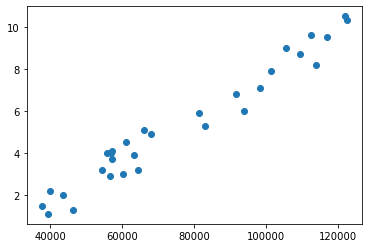

In [4]:
#plotting scatter plot to understand relationship between the target and the independent variable.
plt.scatter(sal['Salary'],sal['YearsExperience']);

In [5]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
#defining x and y variable
x=np.array([sal['YearsExperience']]).transpose()
y=sal['Salary']

In [7]:
#training model by using ols and sklearn 
model_ols = sm.OLS(y,sm.add_constant(x)).fit()
model_sk = LinearRegression()
model_sk.fit(x,y)

LinearRegression()

In [8]:
model_sk.coef_,model_sk.score(x,y),model_ols.rsquared,model_ols.summary()

(array([9449.96232146]),
 0.9569566641435086,
 0.9569566641435086,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 Salary   R-squared:                       0.957
 Model:                            OLS   Adj. R-squared:                  0.955
 Method:                 Least Squares   F-statistic:                     622.5
 Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.14e-20
 Time:                        03:01:21   Log-Likelihood:                -301.44
 No. Observations:                  30   AIC:                             606.9
 Df Residuals:                      28   BIC:                             609.7
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 --

In [9]:
prediction = model_sk.predict(x)
mse = mean_squared_error(y,prediction)
rmse = np.sqrt(mse)
mse,rmse

(31270951.722280968, 5592.043608760662)

In [10]:
model_sk.intercept_,model_sk.score(x,y)

(25792.20019866871, 0.9569566641435086)

cooks distance analysis for influential points.
here 2 points are influential so we can remove it but our score is pretty good so i am not acting on it for now

In [11]:
#cooks distance for influence point analysis
model_ols_influence = model_ols.get_influence()
(c, _) = model_ols_influence.cooks_distance

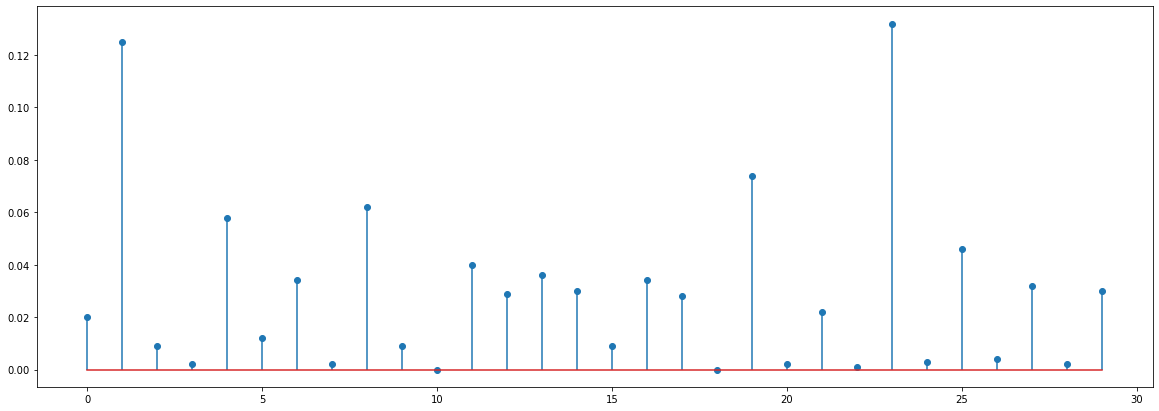

In [12]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(x)),np.round(c,3));

In [13]:
N = len(sal)
4/N

0.13333333333333333

### There are no such influential point or outlier in the data so this is our final accuracy

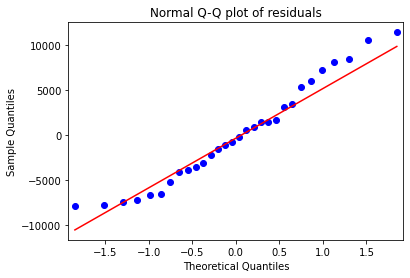

In [14]:
qqplot=sm.qqplot(model_ols.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# The accuracy of the final model is 95.7%
